In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import math
import csv
import os

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series.csv

In [3]:
os.getcwd()

'/Users/anathayna/Downloads/jupyter-notebook/edo'

In [13]:
df = pd.read_csv('/Users/anathayna/Downloads/jupyter-notebook/edo/data/time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [5]:
N = 15000
I0 = 1
R0 = 0
M0 = 0

In [6]:
S0 = N - I0 - R0 - M0
y0 = S0, I0, R0, M0

In [7]:
beta = 0.0001
gama = 1/10
alpha = 0.03

In [8]:
dias = range(0, 61)
integrate = [0, 1001]

In [9]:
def deriv(t, y, N, beta, gama, alpha):
    S, I, R, M = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gama * I - alpha * I
    dRdt = gama * I
    dMdt = alpha * I
    return dSdt, dIdt, dRdt, dMdt

In [10]:
sol = solve_ivp(deriv, integrate, y0, args=(N, beta, gama, alpha), t_eval=dias,
                method='RK23')

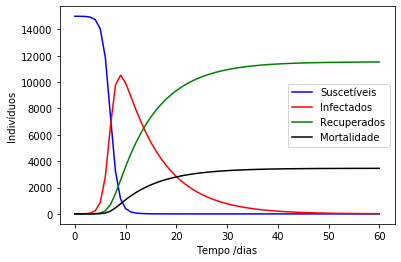

In [11]:
graf = plt.figure(facecolor='w')
plt.xlabel('Tempo /dias')
plt.ylabel('Indivíduos')
plt.plot(sol.t, sol.y[0], 'b', label='Suscetíveis')
plt.plot(sol.t, sol.y[1], 'r', label='Infectados')
plt.plot(sol.t, sol.y[2], 'g', label='Recuperados')
plt.plot(sol.t, sol.y[3], 'k', label='Mortalidade')
plt.legend()
plt.show()